<a href="https://colab.research.google.com/github/llll121/Introduction-to-ML/blob/main/Week3Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['type'] = pd.Series(iris.target)

In [3]:

X = iris_df.iloc[:,:4]
y = iris_df.iloc[:,4]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [4]:
ks = []
scores = []
for k in range(32)[1:]:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(estimator=knn, X=X, y=y, cv=10)
    ks.append(k)
    scores.append(score.mean())

score_df = pd.DataFrame()
score_df['k'] = pd.Series(ks)
score_df['score'] = pd.Series(scores)
score_df.head()

,k,score
0,1,0.960000
1,2,0.953333
2,3,0.966667
3,4,0.966667
4,5,0.966667


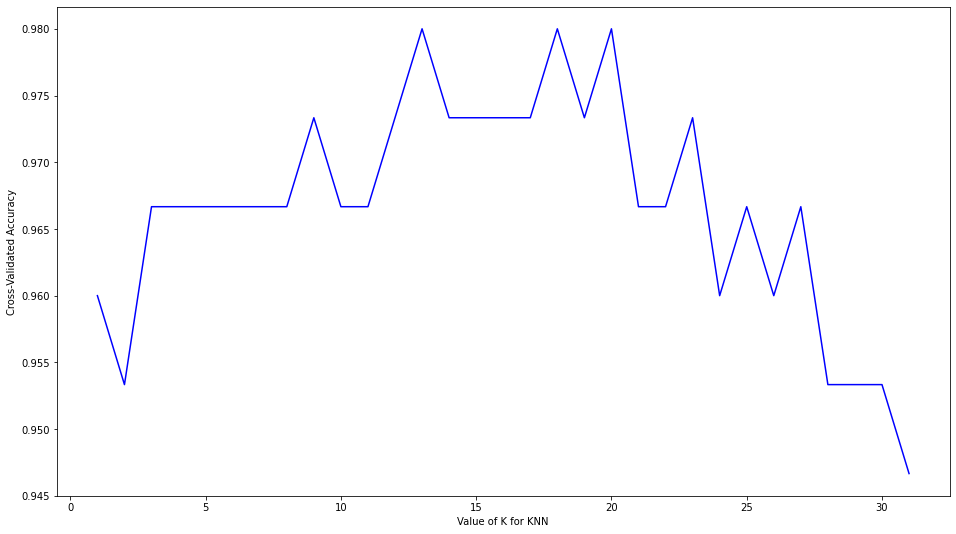

In [5]:
figure = plt.figure(figsize=(16,9))
plt.plot(score_df['k'],score_df['score'], 'b-')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

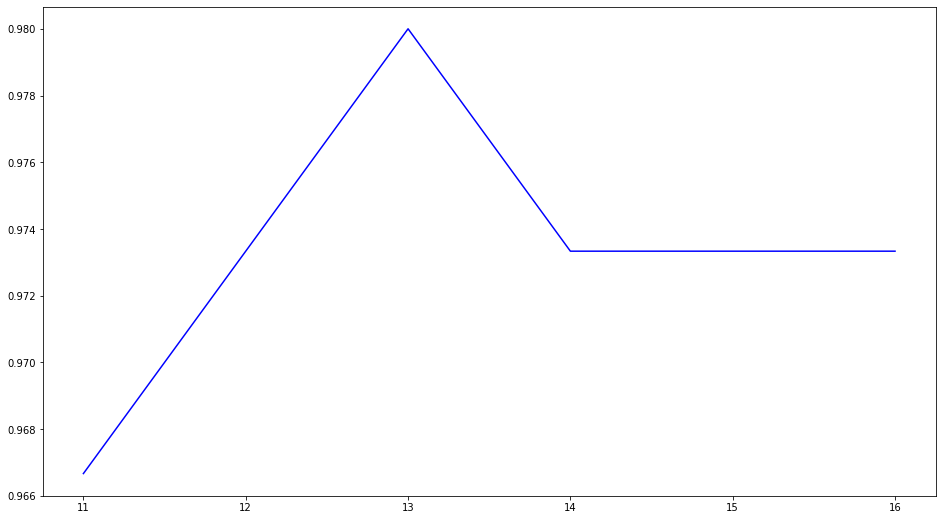

In [6]:
figure = plt.figure(figsize=(16,9))
plt.plot(score_df.iloc[10:16,0],score_df.iloc[10:16,1], 'b-')
plt.show()

# Use GridSearchCV to confirm k=13 has the optimal parameter

In [7]:
gs = {'n_neighbors': np.arange(1,32)}
knn_gs = KNeighborsClassifier()
knn_param_search = GridSearchCV(knn_gs, gs, cv=10)
knn_param_search.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])})

In [8]:
knn_param_search.best_params_

{'n_neighbors': 13}

In [9]:
knn_param_search.best_score_

0.9800000000000001